In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../data/netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
threshold = len(df) * 0.05
print(threshold)

440.35


In [8]:
columns_to_drop = df.columns[(df.isna().sum() <= threshold) & (df.isna().sum() > 0)]
print(columns_to_drop)

Index(['date_added', 'rating', 'duration'], dtype='object')


In [9]:
df.dropna(subset=columns_to_drop, inplace=True)
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")

In [10]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.shape

(8790, 12)

In [12]:
unique_counts = df.nunique()
print(unique_counts)

show_id         8790
type               2
title           8790
director        4527
cast            7679
country          749
date_added      1765
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64


In [13]:
# Categorical columns: type, country, release_year, rating, listed_in
# Numerical columns: duration

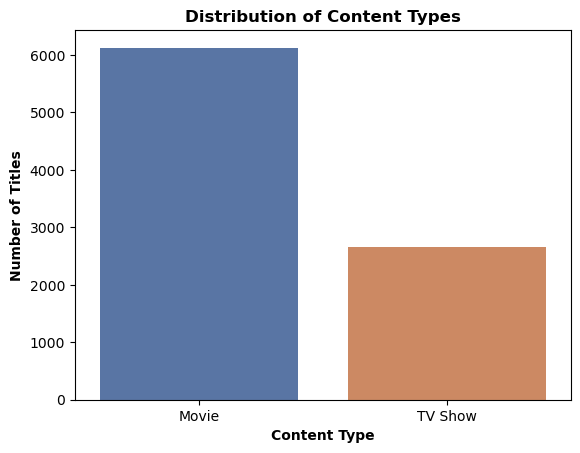

In [14]:
sns.countplot(data=df, x="type", hue="type", palette="deep")
plt.title("Distribution of Content Types", fontsize=12, fontweight="bold")
plt.xlabel("Content Type", fontsize=10, fontweight="bold")
plt.ylabel("Number of Titles", fontsize=10, fontweight="bold")
plt.show()

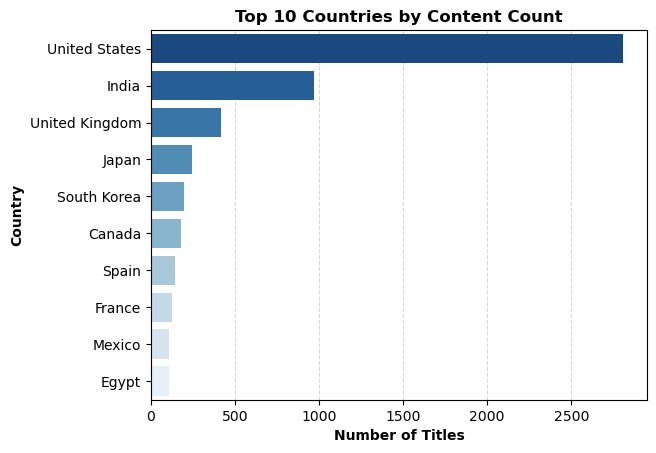

In [15]:
countries = df["country"].value_counts().drop("Unknown").iloc[0:10].reset_index()

sns.barplot(data=countries, y="country", x="count", hue="country", palette="Blues_r", zorder=2)
plt.title("Top 10 Countries by Content Count", fontsize=12, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=10, fontweight="bold")
plt.ylabel("Country", fontsize=10, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5, zorder=0)
plt.show()

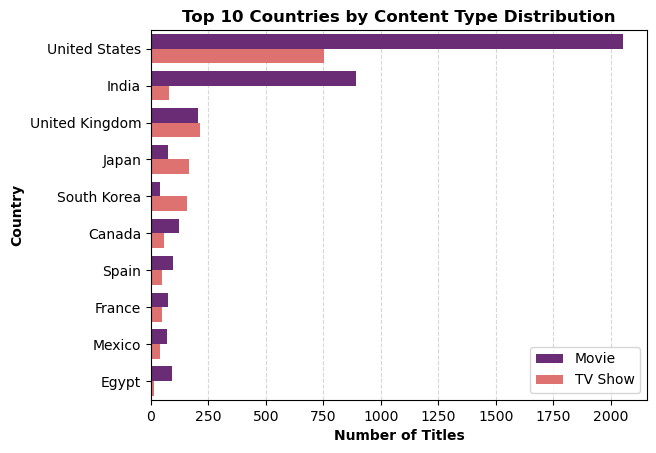

In [16]:
countries = df["country"].value_counts().drop("Unknown").iloc[0:10].index
top_countries = df[df["country"].isin(countries)][["country", "type"]]

sns.countplot(data=top_countries, y="country", hue="type", palette="magma", order=countries, zorder=2)
plt.title("Top 10 Countries by Content Type Distribution", fontsize=12, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=10, fontweight="bold")
plt.ylabel("Country", fontsize=10, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5, zorder=0)
plt.legend().set_title("")
plt.show()

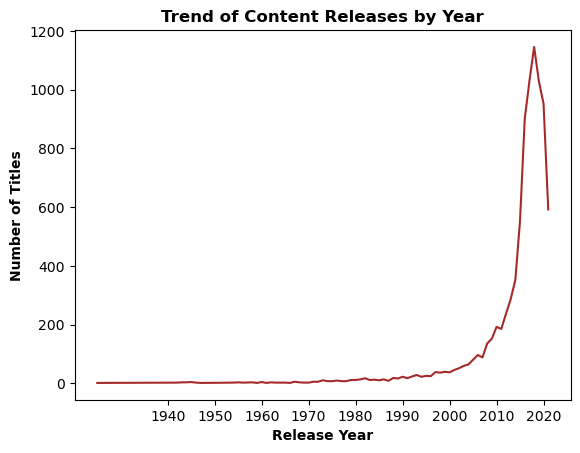

In [17]:
years = df["release_year"].value_counts().sort_index().reset_index()

sns.lineplot(data=years, x="release_year", y="count", color="brown")
plt.title("Trend of Content Releases by Year", fontsize=12, fontweight="bold")
plt.xlabel("Release Year", fontsize=10, fontweight="bold")
plt.ylabel("Number of Titles", fontsize=10, fontweight="bold")
plt.xticks(ticks=range(1940, 2022, 10), labels=range(1940, 2022, 10))
plt.show()

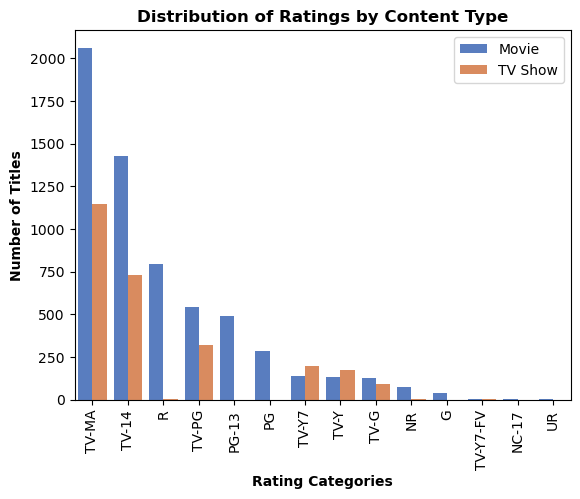

In [18]:
ratings = df[["rating", "type"]].value_counts().reset_index()

sns.barplot(data=ratings, x="rating", y="count", hue="type", palette="muted")
plt.title("Distribution of Ratings by Content Type", fontsize=12, fontweight="bold")
plt.xlabel("Rating Categories", fontsize=10, fontweight="bold")
plt.ylabel("Number of Titles", fontsize=10, fontweight="bold")
plt.legend().set_title("")
plt.xticks(rotation=90)
plt.show()

In [19]:
df_copy = df.copy()
df_copy["listed_in"] = df_copy["listed_in"].str.split(", ")
df_copy = df_copy.explode("listed_in")

genres = df_copy[["listed_in", "type"]].value_counts().reset_index()
genres.columns = ["genre", "type", "count"]

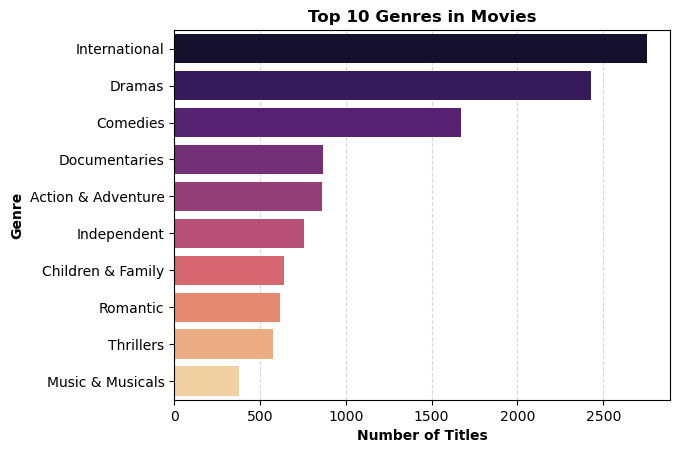

In [20]:
top_movie_genres = genres[genres["type"] == "Movie"].iloc[0:10]
top_movie_genres["genre"] = top_movie_genres["genre"].str.replace(" Movies", "", regex=False).str.strip()

sns.barplot(data=top_movie_genres, y="genre", x="count", hue="genre", palette="magma", zorder=2)
plt.title("Top 10 Genres in Movies", fontsize=12, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=10, fontweight="bold")
plt.ylabel("Genre", fontsize=10, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5, zorder=0)
plt.show()

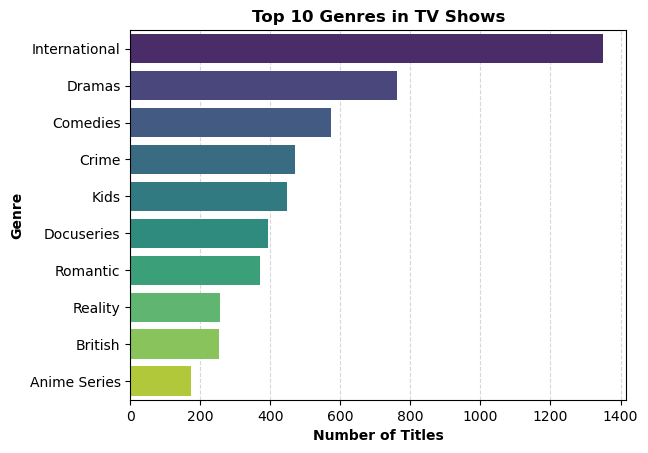

In [21]:
top_tv_genres = genres[genres["type"] == "TV Show"].iloc[0:10]
top_tv_genres["genre"] = top_tv_genres["genre"].str.replace(" TV Shows|TV|'", "", regex=True).str.strip()

sns.barplot(data=top_tv_genres, y="genre", x="count", hue="genre", palette="viridis", zorder=2)
plt.title("Top 10 Genres in TV Shows", fontsize=12, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=10, fontweight="bold")
plt.ylabel("Genre", fontsize=10, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5, zorder=0)
plt.show()

In [22]:
df_genre = df.copy()
df_genre["listed_in"] = df_genre["listed_in"].str.split(", ")
df_genre = df_genre.explode("listed_in")

In [23]:
movie_genres = df_genre[df_genre["type"] == "Movie"]["listed_in"].value_counts().iloc[0:10].reset_index()
movie_genres = movie_genres["listed_in"].values
movies = df_genre[(df_genre["type"] == "Movie")&(df_genre["listed_in"].isin(movie_genres))][["release_year", "listed_in"]].value_counts().reset_index()
movies.columns = ["year", "genre", "count"]
movies["genre"] = movies["genre"].str.replace(" Movies", "", regex=False)
movies = movies[movies["year"] >= 2000]

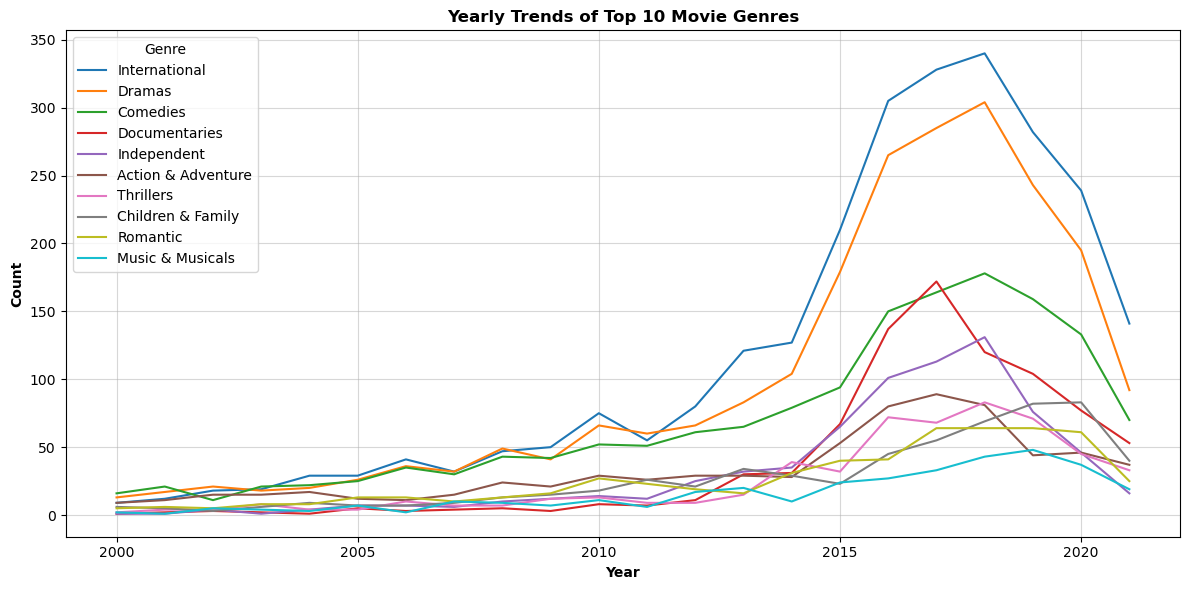

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies, x="year", y="count", hue="genre", palette="tab10")
plt.title("Yearly Trends of Top 10 Movie Genres", fontsize=12, fontweight='bold')
plt.xlabel("Year", fontsize=10, fontweight="bold")
plt.ylabel("Count", fontsize=10, fontweight="bold")
plt.legend().set_title("Genre")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [25]:
tv_genres = df_genre[df_genre["type"] == "TV Show"]["listed_in"].value_counts().iloc[0:10].reset_index()
tv_genres = tv_genres["listed_in"].values
tv_shows = df_genre[(df_genre["type"] == "TV Show")&(df_genre["listed_in"].isin(tv_genres))][["release_year", "listed_in"]].value_counts().reset_index()
tv_shows.columns = ["year", "genre", "count"]
tv_shows["genre"] = tv_shows["genre"].str.replace(" TV Shows|TV|'", "", regex=True).str.strip()
tv_shows = tv_shows[tv_shows["year"] >= 2000]

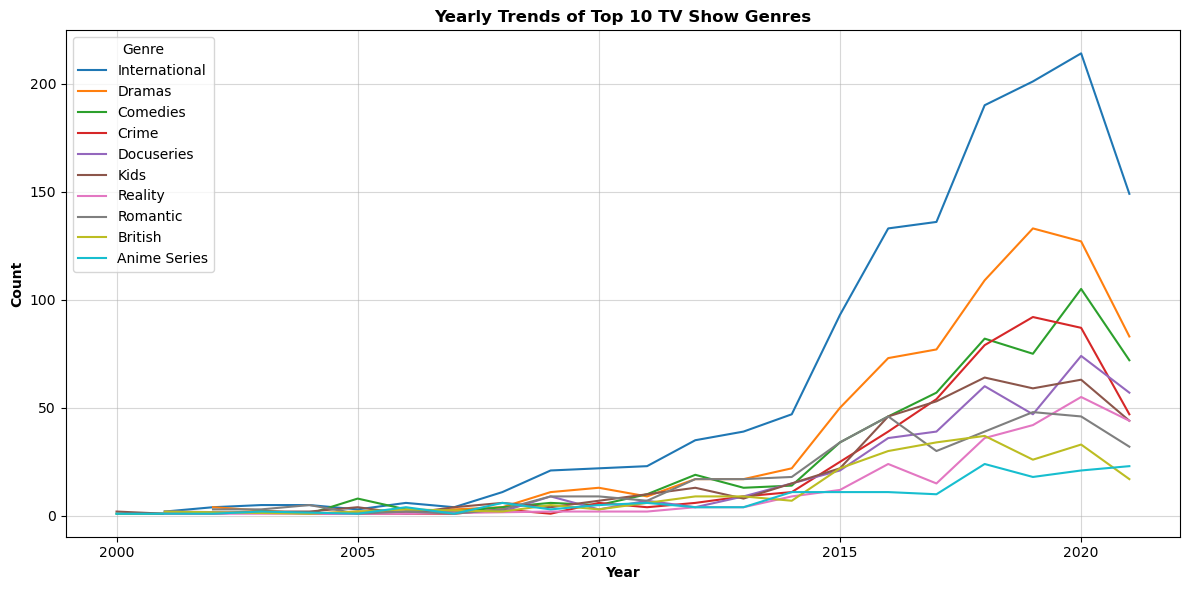

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=tv_shows, x="year", y="count", hue="genre", palette="tab10")
plt.title("Yearly Trends of Top 10 TV Show Genres", fontsize=12, fontweight="bold")
plt.xlabel("Year", fontsize=10, fontweight="bold")
plt.ylabel("Count", fontsize=10, fontweight="bold")
plt.legend().set_title("Genre")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [27]:
df_duration = df.copy()

In [28]:
movie_durations = df_duration[df_duration["type"] == "Movie"][["duration"]].reset_index()
movie_durations["duration"] = movie_durations["duration"].str.replace(" min", "", regex=False).astype("int")

less_than_one_hour = 60
one_to_one_half_hour = 90
one_half_to_two_hour = 120
above_two_hours = movie_durations["duration"].max()

labels = ["0-1 hr", "1-1.5 hrs", "1.5-2 hrs", "2+ hrs"]
bins = [0, less_than_one_hour, one_to_one_half_hour, one_half_to_two_hour, above_two_hours]
movie_durations["category"] = pd.cut(movie_durations["duration"], labels=labels, bins=bins)
movie_duration_categories2 = movie_durations["category"].value_counts().reset_index()

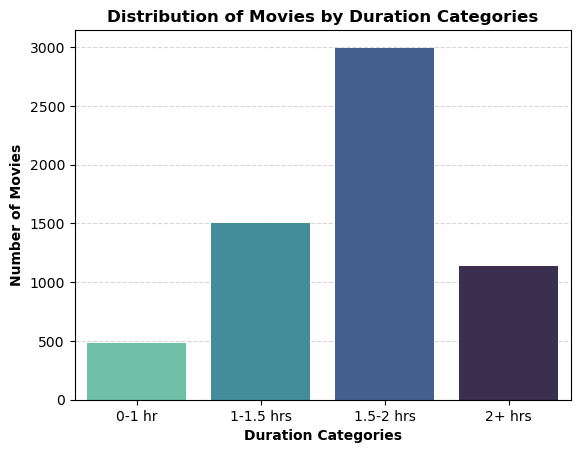

In [29]:
sns.barplot(data=movie_duration_categories2, x="category", y="count", hue="category", palette="mako_r", zorder=2)
plt.title("Distribution of Movies by Duration Categories", fontsize=12, fontweight="bold")
plt.xlabel("Duration Categories", fontsize=10, fontweight="bold")
plt.ylabel("Number of Movies", fontsize=10, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5, zorder=1)
plt.show()